<a href="https://colab.research.google.com/github/urza3tar3/ai/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine learning project**

Predicting MRSP (manufacturer's suggested retail price)
* Read the cars CSV file and explore its columns
* Select features( explore mutual information and feature engineering to select and create features)
* select target
* Preprocess dataset:
1. Clean missing values in numeric features
2. Clean missing values in categoracal features
3. Encode categorical features
* Split dataset to train and validation (Single or cross validation?)
* Choose model (regression or classification)
* Model validation: create a function to test performance of the model
* Optimize model parameters (best leaf nodes, n estimators, patience, learning rate...) 
* Build final model train it on all dataset

In [29]:
import pandas as pd   
# Load dataset
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [30]:
dataset = pd.read_csv('/content/gdrive/MyDrive/cars.csv')
import numpy as np


**PREPROCESSING**

In [31]:
dataset.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [32]:
dataset

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [33]:
dataset.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [35]:
dataset.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


FIILING OUR NUMERICAL MISSING VALUES WITH THE MEAN

In [36]:
dataset["Engine Cylinders"] = dataset["Engine Cylinders"].replace(np.nan)
dataset["Engine HP"] = dataset["Engine HP"].replace(np.nan)
dataset["Number of Doors"] = dataset["Number of Doors"].replace(np.nan)


mean_EngineCylinder = dataset["Engine Cylinders"].mean()
mean_EngineHP = dataset["Engine HP"].mean()
mean_NumberofDoors = dataset["Number of Doors"].mean()


dataset["Engine Cylinders"] = dataset["Engine Cylinders"].replace(np.nan,mean_EngineCylinder)
dataset["Engine HP"] = dataset["Engine HP"].replace(np.nan, mean_EngineHP)
dataset["Number of Doors"] = dataset["Number of Doors"].replace(np.nan , mean_NumberofDoors)


In [37]:
dataset.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

HANDLING MISSING VALUES THATS MORE THAN 40% OF OUR DATA SO WE DROPPED IT

In [38]:
dataset.drop("Market Category", axis=1, inplace=True)

CATEGORICAL FEATURES 

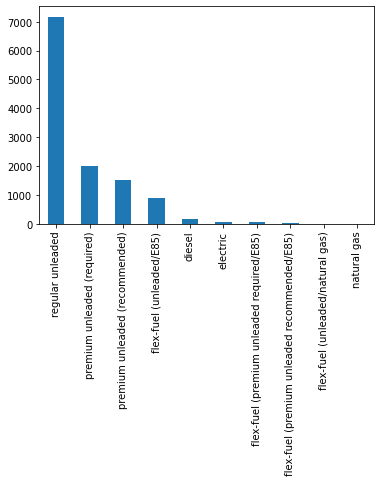

In [39]:
dataset["Engine Fuel Type"].value_counts().plot.bar()

In [40]:
#filling the nan values with the most frequent word
EngineFuelType = dataset[["Engine Fuel Type"]]
EngineFuelType.head(50)
regularunleaded = 'regular unleaded'

In [41]:
#df_clean = EngineFuelType.apply(lambda x: x.fillna(x.value_counts().index[0]))
#df_clean

In [42]:
dataset["Engine Fuel Type"] = dataset["Engine Fuel Type"].replace(np.nan , regularunleaded)


In [43]:
dataset.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  object 
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  float64
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  highway MPG        11914 non-null  int64  
 12  city mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [45]:

data_catog=dataset[['Make','Model','Engine Fuel Type','Transmission Type','Driven_Wheels','Vehicle Style']].astype('category')
data_catog.head()


,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Convertible


In [46]:
# Using SciKit Learn
# Encoding make column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset['make_encoded'] = labelencoder.fit_transform(dataset['Make'])
dataset['model_encoded'] = labelencoder.fit_transform(dataset['Model'])
dataset['fueltype_encoded'] = labelencoder.fit_transform(dataset['Engine Fuel Type'])
dataset['transmission_encoded'] = labelencoder.fit_transform(dataset['Driven_Wheels'])
dataset['model_encoded'] = labelencoder.fit_transform(dataset['Model'])
dataset['vehiclestyle_encoded'] = labelencoder.fit_transform(dataset['Vehicle Style'])
dataset['vehiclesize_encoded'] = labelencoder.fit_transform(dataset['Vehicle Size'])
# Viewing few rows of make and its encoded columns
#dataset[['Make', 'make_encoded']].sample(20)

In [47]:
dataset.drop(['Make','Model','Engine Fuel Type','Transmission Type','Driven_Wheels','Vehicle Style'] ,axis=1, inplace= True)

In [48]:
dataset.drop("Vehicle Size", axis=1 , inplace= True )

In [49]:
dataset.columns

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP', 'make_encoded',
       'model_encoded', 'fueltype_encoded', 'transmission_encoded',
       'vehiclestyle_encoded', 'vehiclesize_encoded'],
      dtype='object')

In [50]:
y = dataset.MSRP
X = dataset.drop(['MSRP'], axis=1)
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

#rfr_rating = RandomForestRegressor(n_estimators=100, random_state=42, max_depth = 10000, min_samples_split = 0.001)

#rfr_rating.fit(X_train, y_train)
#pred = rfr_rating.predict(X_test)
#print("Accuracy: %s" % str(rfr_rating.score(X_test, y_test)))

In [69]:
#model.fit(X_train, y_train)
#print("Accuracy: %s" % str(model.score(X_test, y_test)))

In [59]:
from sklearn.model_selection import GridSearchCV
param_grid = {
  
    'n_estimators': [100, 200, 300, 1000]
}

random_forest_model = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = random_forest_model , param_grid = param_grid, cv = 3, n_jobs = -1)
grid_search.fit(X_train , y_train)

pred = grid_search.predict(X_test)

In [55]:
grid_search.best_params_

{'n_estimators': 100}

In [60]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, pred)
print('MAE:', score)

MAE: 3442.8503200655987


In [63]:
model = RandomForestRegressor(n_estimators = 100,random_state=0)
model.fit(X_train , y_train)
preds = model.predict(X_test)


In [64]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, preds)
print('MAE:', score)

MAE: 3405.5225219796566


In [65]:
y.mean()

40594.737032063116

In [66]:
modelrf = RandomForestRegressor(n_estimators = 100,random_state=0)
modelrf.fit(X, y)

RandomForestRegressor(random_state=0)